<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** VISUALIZAÇÃO DE DADOS PARA TOMADA DE DECISÃO [TURMA 01D] - 2023/1 - Trilha 4.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/VD_T4.ipynb<br>
***

#### **Para esta atividade, vamos explorar o dataset da Netflix, disponível no Kaggle ([https://www.kaggle.com/shivamb/netflix-shows](https://www.kaggle.com/shivamb/netflix-shows)).**

#### **Importando as bibliotecas básicas.**
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


#### **Exploração dos dados.**
***

In [2]:
df = pd.read_csv('../data/netflix_titles.csv')

# results
display(df.head())
display(df.dtypes)
display(df.shape)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

(8807, 12)

#### **Preparação dos dados.**
***

In [3]:
# clean the data and see which are the redundant or unnecessary cols
del_col_list = ['show_id', 'duration']
df = df.drop(del_col_list, axis=1)

# results
display(df.head())
display(df.shape)


,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


(8807, 10)

In [4]:
# adjusting column types
df.date_added = pd.to_datetime(df['date_added'])

# creating other data columns
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

# results
display(df.head())
display(df.dtypes)
display(df.shape)


,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,month_added,month_name_added,year_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0


type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
listed_in                   object
description                 object
month_added                float64
month_name_added            object
year_added                 float64
dtype: object

(8807, 13)

In [5]:
# identifying columns with null values
# display(df.isnull().sum())

# identifying percentage rate of null values
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate, 2)))


director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
month_added null rate: 0.11%
month_name_added null rate: 0.11%
year_added null rate: 0.11%


In [6]:
# replacements
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)

# excluding dataset rows that contain at least one null value
df.dropna(inplace=True)

# dropping the duplicates from the dataset
df.drop_duplicates(inplace=True)


In [7]:
# identifying columns with null values
display(df.isnull().sum())


type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
listed_in           0
description         0
month_added         0
month_name_added    0
year_added          0
dtype: int64

In [8]:
# helper column for various plots
df["count"] = 1

# many productions have several countries listed - this will skew our results, we'll grab the first one mentioned
# lets retrieve just the first country
df["first_country"] = df["country"].apply(lambda x: x.split(",")[0])
df["first_country"].head()

# rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly
ratings_ages = {
    "TV-PG": "Older Kids",
    "TV-MA": "Adults",
    "TV-Y7-FV": "Older Kids",
    "TV-Y7": "Older Kids",
    "TV-14": "Teens",
    "R": "Adults",
    "TV-Y": "Kids",
    "NR": "Adults",
    "PG-13": "Teens",
    "TV-G": "Kids",
    "PG": "Older Kids",
    "G": "Kids",
    "UR": "Adults",
    "NC-17": "Adults",
}

df["target_ages"] = df["rating"].replace(ratings_ages)
df["target_ages"].unique()

# genre
df["genre"] = df["listed_in"].apply(
    lambda x: x.replace(" ,", ",").replace(", ", ",").split(",")
)

# reducing name length
df["first_country"].replace("United States", "USA", inplace=True)
df["first_country"].replace("United Kingdom", "UK", inplace=True)
df["first_country"].replace("South Korea", "S. Korea", inplace=True)

# results
display(df.head())
display(df.shape)


,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,month_added,month_name_added,year_added,count,first_country,target_ages,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",9.0,September,2021.0,1,USA,Teens,[Documentaries]
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,September,2021.0,1,South Africa,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,September,2021.0,1,USA,Adults,"[Crime TV Shows, International TV Shows, TV Ac..."
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,September,2021.0,1,USA,Adults,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,September,2021.0,1,India,Adults,"[International TV Shows, Romantic TV Shows, TV..."


(8793, 17)

#### **Algumas visualizações exploratórias.**
***

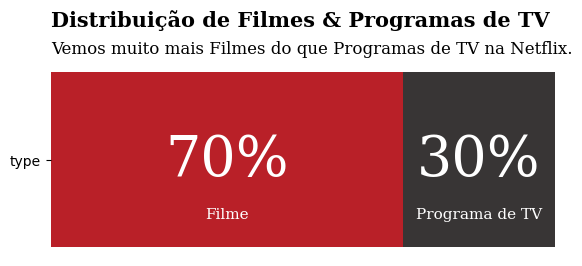

In [9]:
# for viz: Ratio of Movies and TV shows
x = df.groupby(["type"])["type"].count()
y = len(df)
r = ((x / y)).round(2)

mf_ratio = pd.DataFrame(r).T

# plot
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio["Movie"], color="#b20710", alpha=0.9, label="Male")
ax.barh(
    mf_ratio.index,
    mf_ratio["TV Show"],
    left=mf_ratio["Movie"],
    color="#221f1f",
    alpha=0.9,
    label="Female",
)

ax.set_xlim(0, 1)
ax.set_xticks([])

# movie percentage
for i in mf_ratio.index:
    ax.annotate(
        f"{int(mf_ratio['Movie'][i]*100)}%",
        xy=(mf_ratio["Movie"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=40,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )

    ax.annotate(
        "Filme",
        xy=(mf_ratio["Movie"][i] / 2, -0.25),
        va="center",
        ha="center",
        fontsize=11,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )

for i in mf_ratio.index:
    ax.annotate(
        f"{int(mf_ratio['TV Show'][i]*100)}%",
        xy=(mf_ratio["Movie"][i] + mf_ratio["TV Show"][i] / 2, i),
        va="center",
        ha="center",
        fontsize=40,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )
    ax.annotate(
        "Programa de TV",
        xy=(mf_ratio["Movie"][i] + mf_ratio["TV Show"][i] / 2, -0.25),
        va="center",
        ha="center",
        fontsize=11,
        fontweight="light",
        fontfamily="serif",
        color="white",
    )

# title and subtitle
fig.text(
    0.125,
    1.03,
    "Distribuição de Filmes & Programas de TV",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
)
fig.text(
    0.125,
    0.92,
    "Vemos muito mais Filmes do que Programas de TV na Netflix.",
    fontfamily="serif",
    fontsize=12,
)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_visible(False)

# removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()


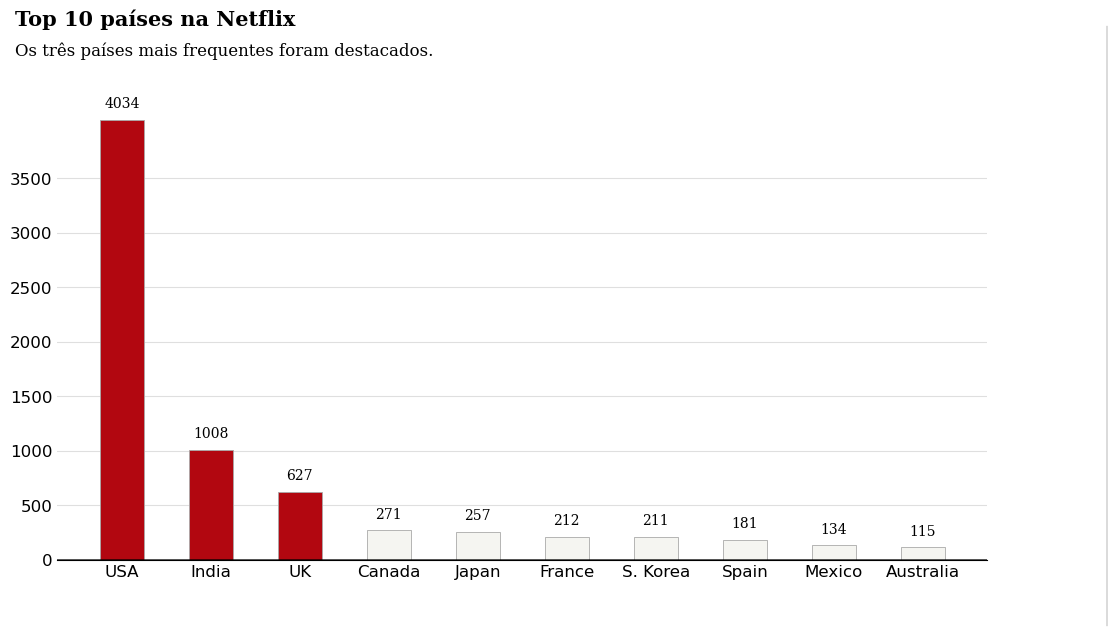

In [10]:
# data
data = df.groupby("first_country")["count"].sum().sort_values(ascending=False)[:10]

# plot
color_map = ["#f5f5f1" for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = "#b20710"  # color highlight

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(
    data.index, data, width=0.5, edgecolor="darkgray", linewidth=0.6, color=color_map
)

# annotations
for i in data.index:
    ax.annotate(
        f"{data[i]}",
        xy=(i, data[i] + 150),
        va="center",
        ha="center",
        fontweight="light",
        fontfamily="serif",
    )

# remove border from plot
for s in ["top", "left", "right"]:
    ax.spines[s].set_visible(False)

# title and sub-title
fig.text(
    0.09,
    1,
    "Top 10 países na Netflix",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.09,
    0.95,
    "Os três países mais frequentes foram destacados.",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

ax.grid(axis="y", linestyle="-", alpha=0.4)

grid_y_ticks = np.arange(0, 4000, 500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)

ax.tick_params(axis="both", which="major", labelsize=12)

import matplotlib.lines as lines

l1 = lines.Line2D(
    [1, 1], [0, 1], transform=fig.transFigure, figure=fig, color="black", lw=0.2
)
fig.lines.extend([l1])

ax.tick_params(axis="both", which="both", length=0)

plt.show()


#### **Algumas visualizações de séries temporais.**
***

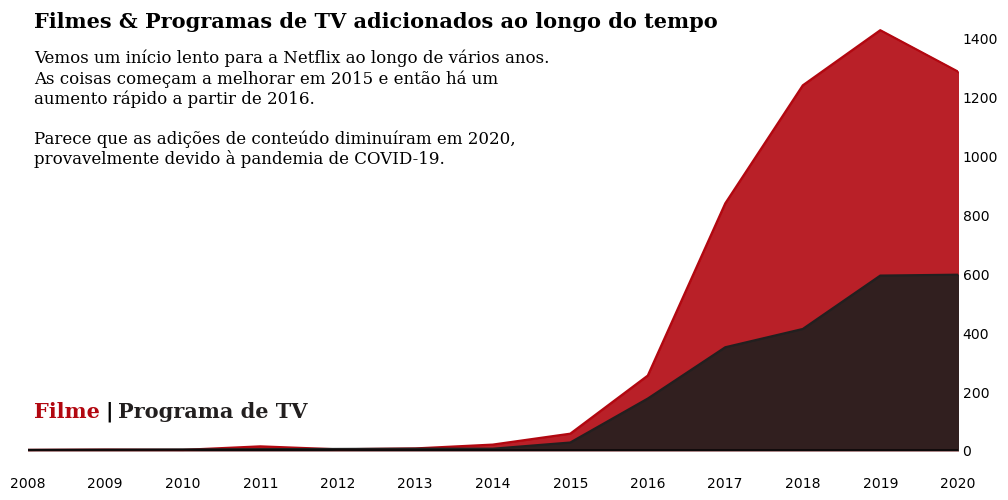

In [11]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df["type"].value_counts().index):
    mtv_rel = df[df["type"] == mtv]["year_added"].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)

ax.yaxis.tick_right()

ax.axhline(y=0, color="black", linewidth=1.3, alpha=0.7)

for s in ["top", "right", "bottom", "left"]:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(
    0.13,
    0.85,
    "Filmes & Programas de TV adicionados ao longo do tempo",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.13,
    0.59,
    """Vemos um início lento para a Netflix ao longo de vários anos.
As coisas começam a melhorar em 2015 e então há um
aumento rápido a partir de 2016.

Parece que as adições de conteúdo diminuíram em 2020,
provavelmente devido à pandemia de COVID-19.
""",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(
    0.13,
    0.2,
    "Filme",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#b20710",
)
fig.text(
    0.19, 0.2, "|", fontweight="bold", fontfamily="serif", fontsize=15, color="black"
)
fig.text(
    0.2,
    0.2,
    "Programa de TV",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#221f1f",
)

ax.tick_params(axis="both", which="both", length=0)

plt.show()


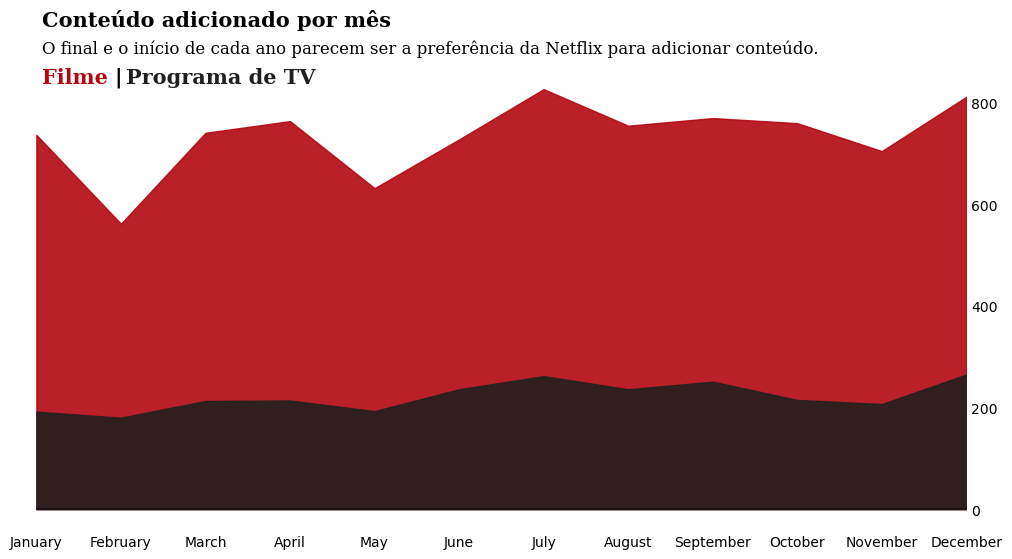

In [12]:
month_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

df["month_name_added"] = pd.Categorical(
    df["month_name_added"], categories=month_order, ordered=True
)

data_sub = (
    df.groupby("type")["month_name_added"]
    .value_counts()
    .unstack()
    .fillna(0)
    .loc[["TV Show", "Movie"]]
    .cumsum(axis=0)
    .T
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df["type"].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv, alpha=0.9)

ax.yaxis.tick_right()

ax.axhline(y=0, color="black", linewidth=1.3, alpha=0.4)

for s in ["top", "right", "bottom", "left"]:
    ax.spines[s].set_visible(False)

ax.grid(False)
#ax.set_xticklabels(data_sub.index, fontfamily="serif", rotation=0)
ax.margins(x=0)

fig.text(
    0.13,
    0.95,
    "Conteúdo adicionado por mês",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.13,
    0.905,
    "O final e o início de cada ano parecem ser a preferência da Netflix para adicionar conteúdo.",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

fig.text(
    0.13,
    0.855,
    "Filme",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#b20710",
)
fig.text(
    0.19, 0.855, "|", fontweight="bold", fontfamily="serif", fontsize=15, color="black"
)
fig.text(
    0.2,
    0.855,
    "Programa de TV",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    color="#221f1f",
)

ax.tick_params(axis="both", which="both", length=0)

plt.show()
